In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'tugasxgboost.csv'
data = pd.read_csv(file_path)

# Display the first few rows to examine the dataset's structure
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Generate summary statistics
summary_stats = data.describe()
print("\nSummary statistics for each feature:\n", summary_stats)


     X1    X2    X3   X4    X5    X6    X7        X8    X9   X10  X11  Class
0   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4      5
1   7.8  0.88  0.00  2.6  98.0  25.0  67.0    0.9968  3.20  0.68  9.8      5
2   7.8  0.76  0.04  2.3  92.0  15.0  54.0  997.0000  3.26  0.65  9.8      5
3  11.2  0.28  0.56  1.9  75.0  17.0  60.0  998.0000  3.16  0.58  9.8      6
4   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4      5
Missing values in each column:
 X1       0
X2       0
X3       0
X4       0
X5       0
X6       0
X7       0
X8       0
X9       0
X10      0
X11      0
Class    0
dtype: int64

Summary statistics for each feature:
                 X1           X2           X3           X4           X5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637    81.478684     0.270976     2.538806    77.470294   
std       1.741096   227.799577     0.194801     1.409928    51.628973   
min       4.600000     0.1

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:04:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x800 with 0 Axes>

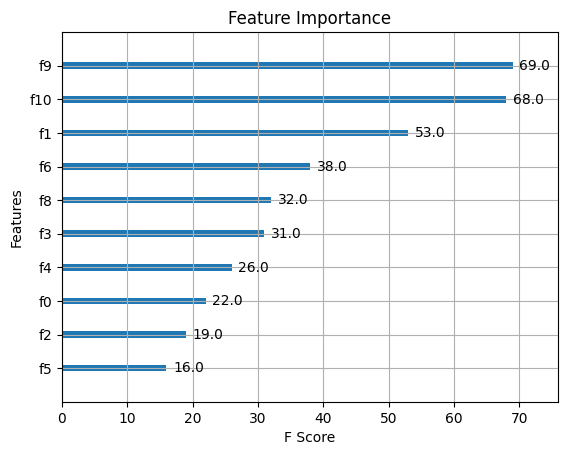

<Figure size 2000x2000 with 0 Axes>

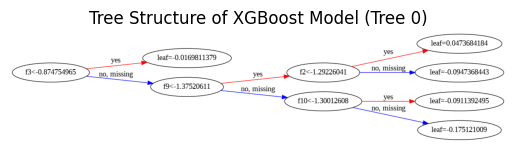

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

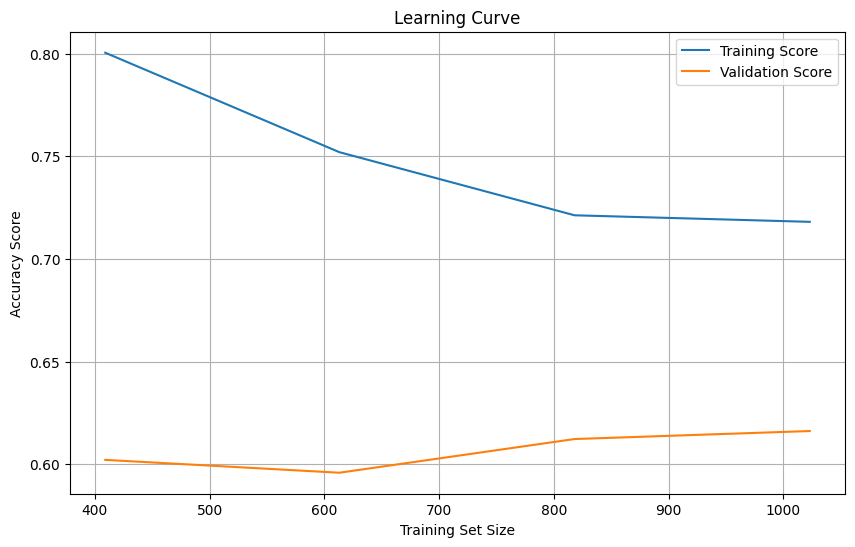

<Figure size 1000x800 with 0 Axes>

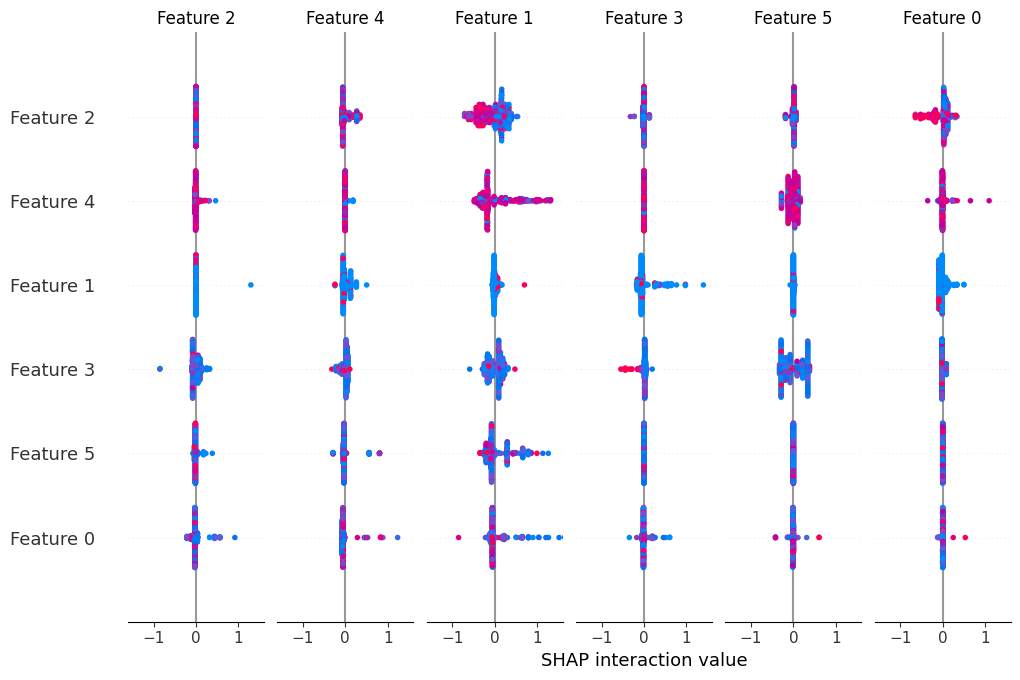

In [11]:
!pip install xgboost
!pip install shap
!pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree, XGBClassifier
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Import LabelEncoder
import shap

# Load the dataset
file_path = 'tugasxgboost.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Select all columns except the last one as features
y = data.iloc[:, -1]   # Select the last column as the target variable

# Encode the target variable using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # This will transform your target variable to start from 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adjust the model parameters to minimize processing time
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=10, max_depth=3)
model.fit(X_train_scaled, y_train)


# 1. Feature Importance Plot
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10, title="Feature Importance", xlabel="F Score", ylabel="Features")
plt.show()

# 2. Tree Structure Visualization (using the first tree)
plt.figure(figsize=(20, 20))
plot_tree(model, num_trees=0, rankdir="LR")
plt.title("Tree Structure of XGBoost Model (Tree 0)")
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, scoring='accuracy',
                                                        train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0])
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

# 4. SHAP Values Plot
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

plt.figure(figsize=(10, 8))
# Import summary_plot directly from shap
#shap.plots.summary_plot(shap_values, X_test_scaled) # Call the summary_plot function from shap.plots
shap.summary_plot(shap_values, X_test_scaled) # Call the summary_plot function from shap.plots
plt.show()